In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [14]:
df_martialstatus = pd.read_excel('/Users/justinsmith/Downloads/Marital status of men and women.xls', header=3)

In [335]:
print(df_martialstatus.head())

       Country  ISO code       Period  Year    Sex Marital status  \
0  Afghanistan         4  Around 1970  1973    Men         Single   
1  Afghanistan         4  Around 1970  1973    Men        Married   
2  Afghanistan         4  Around 1970  1973    Men        Widowed   
3  Afghanistan         4  Around 1970  1973    Men       Divorced   
4  Afghanistan         4  Around 1970  1973  Women         Single   

  Non-standard age groups  15-19  20-24  25-29     ...       65+  Source type  \
0                     NaN   92.2   67.3   38.5     ...       1.6       Survey   
1                     NaN    7.6   31.9   59.1     ...      78.3       Survey   
2                     NaN    0.1    0.7    2.3     ...      19.9       Survey   
3                     NaN    0.0    0.0    0.0     ...       0.1       Survey   
4                     NaN   49.5   11.9    3.7     ...       2.5       Survey   

                Source                                        Survey Name  \
0  National statistic

In [336]:
df_status_15_19 = df_martialstatus.pivot_table(values= '15-19', index=['Marital status', 'Country', 'Year'], columns='Sex')
df_15_19_afghan = df_status_15_19.xs(('Single', 'Afghanistan'))
df_15_19_usa = df_status_15_19.xs(('Single', 'United States of America'))

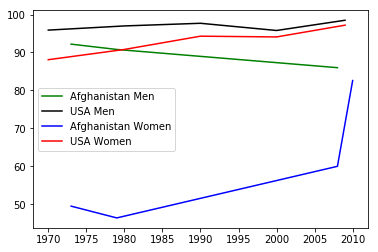

In [114]:
plt.plot(df_15_19_afghan['Men'], color='Green', label='Afghanistan Men')
plt.plot(df_15_19_usa['Men'], color='Black', label='USA Men')
plt.plot(df_15_19_afghan['Women'],color='Blue', label='Afghanistan Women')
plt.plot(df_15_19_usa['Women'], color='Red', label='USA Women')
plt.plot()
plt.legend()
plt.show()

In [ ]:
# This graph shows the trend of single Afghan and USA men and women since the 1970's. While the USA has slowly increased its percentage of men
# and women whp remain single between 15-19. Afghan men in this age range have actually begun to marry more frequently while the afghan women
# have had a steep increase in staying single in recent years.

In [337]:
df_65_plus = df_martialstatus.pivot_table(values='65+', index=['Marital status', 'Country', 'Year'], columns='Sex')
df_65_afghan = df_65_plus.xs(('Single', 'Afghanistan'))
df_65_usa = df_65_plus.xs(('Single', 'United States of America'))

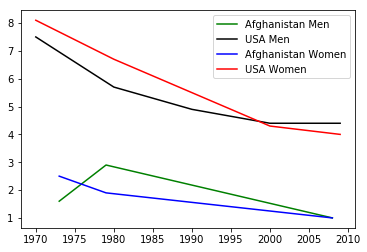

In [123]:
plt.plot(df_65_afghan['Men'], color='Green', label='Afghanistan Men')
plt.plot(df_65_usa['Men'], color='Black', label='USA Men')
plt.plot(df_65_afghan['Women'],color='Blue', label='Afghanistan Women')
plt.plot(df_65_usa['Women'], color='Red', label='USA Women')
plt.plot()
plt.legend()
plt.show()

In [ ]:
# This graph shows the trend of 65+ single Afghan and USA men and women since the 1970's. While the percentage of USA men and women who are 65+
# and single has decreased in recent years, it still has yet to decrease to even the peak of Afghanistan's 65+ single population around 1980. 

In [196]:
df_mrg_by_yr = df_martialstatus.set_index('Year')

In [347]:
df_mrg_by_yr.sort_index().head()

,Country,Sex,Marital status,15-19
Year,,,,
1960,Antigua and Barbuda,Women,Single,98.6
1960,Montserrat,Men,Widowed,0.0
1960,United States Virgin Islands,Men,Single,97.2
1960,United States Virgin Islands,Men,Married,1.8
1960,United States Virgin Islands,Men,Consensual union,0.9


In [206]:
df_mrg_by_yr = df_mrg_by_yr[['Country', 'Sex', 'Marital status', '15-19']]

In [339]:
df_mrg_by_yr.sort_index()
df_mrg_by_yr.head()

,Country,Sex,Marital status,15-19
Year,,,,
1973,Afghanistan,Men,Single,92.2
1973,Afghanistan,Men,Married,7.6
1973,Afghanistan,Men,Widowed,0.1
1973,Afghanistan,Men,Divorced,0.0
1973,Afghanistan,Women,Single,49.5


In [215]:
df_sorted = df_mrg_by_yr.loc[[1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979]]

In [228]:
df_sorted_men = df_sorted[df_sorted['Sex'] == 'Men']
df_sorted_men.head()

,Country,Sex,Marital status,15-19
Year,,,,
1970,Angola,Men,Single,92.4
1970,Angola,Men,Married,7.5
1970,Angola,Men,Widowed,0.1
1970,Angola,Men,Divorced/Separated,0.0
1970,Argentina,Men,Single,98.1


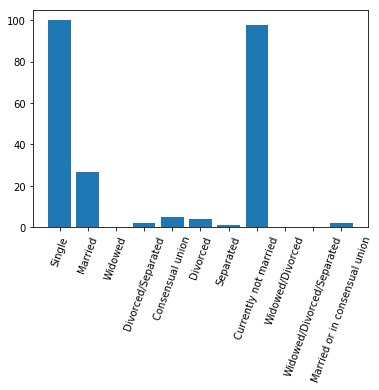

In [345]:
plt.bar(df_sorted_men['Marital status'], df_sorted_men['15-19'])
plt.tick_params(axis='x', rotation=70)
plt.show()

In [ ]:
# Here we have a bar graph Showing the percentage of men 15-19 years old and their martial status in the 1970's.
# You can see by this graph that most people in this age range are single.

In [242]:
df_30s = df_martialstatus[['Country', 'Year', 'Marital status', '30-34', '35-39']]

In [341]:
df_30s_married = df_30s[df_30s['Marital status'] == 'Married']
df_30s_married.dropna()
df_30s_married.head()

,Country,Year,Marital status,30-34,35-39
1,Afghanistan,1973,Married,78.9,87.2
5,Afghanistan,1973,Married,94.2,93.4
9,Afghanistan,1979,Married,82.0,88.9
13,Afghanistan,1979,Married,95.8,94.5
17,Afghanistan,2008,Married,NaN,NaN


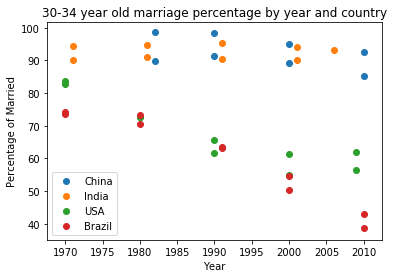

In [334]:
df_30s_married_2 = df_30s_married.set_index('Country')
df_30s_married_china = df_30s_married_2.loc['China']
df_30s_married_india = df_30s_married_2.loc['India']
df_30s_married_usa = df_30s_married_2.loc['United States of America']
df_30s_married_brazil = df_30s_married_2.loc['Brazil']
plt.scatter(df_30s_married_china['Year'], df_30s_married_china['30-34'], cmap='Blue', label='China')
plt.scatter(df_30s_married_india['Year'], df_30s_married_india['30-34'], cmap='Red', label='India')
plt.scatter(df_30s_married_usa['Year'], df_30s_married_usa['30-34'], cmap='Green', label='USA')
plt.scatter(df_30s_married_brazil['Year'], df_30s_married_brazil['30-34'], cmap='Orange', label='Brazil')
plt.title('30-34 year old marriage percentage by year and country')
plt.xlabel('Year')
plt.ylabel('Percentage of Married')
plt.legend()
plt.show()

In [ ]:
# This graph shows men and women, 30-34 year olds, marrigae percentage for China, USA, Brazil, and India. 
# The general trend in each country is that more poeple are staying single longer. India has the least change.
# Brazil on the other hand has had the largest change with less than 50% of 30-34 year olds being married
# which is an absolute change of approximately 30 points since 1970. 